Assigment 4

Vakinwande

Que 1.


Load in monthly house price data in pounds sterling (£) from Jan 1991 to Jan 2015 from
monthlyHousePricesUK.csv and the FTSE100 index from Yahoo Finance (ticker = ^FTSE) over
the same period **(01-Jan-1991 to 31-Jan-2015)**. Using the FTSE100 index as dependent
variable and the house monthly returns as explanatory variable, create a regression model with
MATLAB including a **constant** and calculate the **correlation coefficients** (5points). What do the
results **tell us?** (5points). Use a **hypothesis test** to back up your conclusion about existence of a
**significant relationship** between these two variables (10 points).


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

pre_ftse = pd.read_csv('ftse100.csv')[7:]
ftse = pre_ftse['Adj Close'][::-1]
ftsereturns = (ftse - ftse.shift(1) )/ ftse
monthlypricereturns_i = pd.read_excel('monthly.xls')['Monthly % Change (SA)'][:-7] #explanatory - X
ftsereturnsreindexed_i = pd.DataFrame({"returns":ftsereturns.values}, index = monthlypricereturns_i.index) #dependent- Y
monthlypricereturns = pd.DataFrame(monthlypricereturns_i)
monthlypricereturns = monthlypricereturns.dropna()
ftsereturnsreindexed = ftsereturnsreindexed_i.dropna()

a = monthlypricereturns_i
b = pd.Series(ftsereturnsreindexed_i['returns'])

print "Correlation coefficient matrix\n"

print np.corrcoef(b[1:], a[1:])

print "\nSignificance test\n"

from scipy.stats import linregress

print linregress(a[1:], b[1:])


Using the FTSE100 index returns as dependent variable and the house monthly returns as explanatory variable
The correlation coefficient is 0.02641533

The results tells us from the coefficient that the FTSE returns has no linear correlation or a weak linear correlation with the monthly returns of house prices in the UK.

Doing an hypothesis testing to test the significance of this correlation, we get a p-value of 0.655 at a 95% confidence interval as such we accept the null hypothesis. There is no significant relationship between the two variables, and there is no evidence to prove otherwise from the hypothesis test.



Que 2. Linear regression with multiple explanatory variables (30 points)

The file college.csv file contains information about different US colleges and universities. We
are going to use the number of applications received, the number of enrolled students, the
number of out of state students, the number of admitted students who were in top 10% and top
25% of their class to predict the graduation rate.
a) Calculate the correlation coefficients of the aforementioned variables (5 points).
b) Considering the graduation rate as dependent variable, use stepwise to build the linear
regression model (5 points).
c) Which predictor variables are useful in predicting the graduation rate? Explain how you
got those variables.(5 points)
d) Would the set of predictor variables be useful in predicting the graduation rate if you were
to use BIC to select the model? Why? (5 points)
e) Compare the accuracy of the model using only useful predictors with the one of the model
using all five predictors? (5 points)
f) Given a set of predictor corresponding to Carnegie Mellon University, what graduation
rate value should the most accurate model predict? (5 points)

a) 


|           	| Grad.Rate | Enroll | Outstate | Top10Perc | Top25Perc | NoOfApps 	|
|-----------	|-----------|--------|----------|-----------|-----------|----------	|
| Enroll    	| -0.0223   | 1      | -0.155   | 0.181     | 0.227     | 0.847    	|
| Outstate  	| 0.571     | -0.155 | 1        | 0.562     | 0.489     | 0.0502   	|
| Top10Perc 	| 0.495     | 0.181  | 0.562    | 1         | 0.892     | 0.339    	|
| Top25Perc 	| 0.477     | 0.227  | 0.489    | 0.892     | 1         | 0.352    	|
| NoOfApps  	| 0.147     | 0.847  | 0.050    | 0.338     | 0.352     | 1        	|
| Grad.Rate 	| 1         | -0.022 | 0.571    | 0.495     | 0.477     | 0.147    	|



b) Stepwise regrssion model


Step 1:

Start:  AIC=4419.97
y ~ 1

           Df Sum of Sq    RSS    AIC
+ outstate  1     74732 154245 4115.0
+ top10     1     56103 172875 4203.6
+ top25     1     52160 176817 4221.1
+ apps      1      4931 224046 4405.1
<none>                  228977 4420.0
+ enroll    1       114 228863 4421.6

Step 2:

Step:  AIC=4115
y ~ outstate

         Df Sum of Sq    RSS    AIC
+ top25   1   11767.7 142478 4055.3
+ top10   1   10107.6 144138 4064.3
+ apps    1    3201.7 151044 4100.7
+ enroll  1    1037.1 153208 4111.8
<none>                154245 4115.0

Step 3:

Step:  AIC=4055.34
y ~ outstate + top25

         Df Sum of Sq    RSS    AIC
<none>                142478 4055.3
+ apps    1   292.257 142186 4055.7
+ top10   1   223.874 142254 4056.1
+ enroll  1    40.127 142438 4057.1


Call:

lm(formula = y ~ outstate + top25, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.155  -8.527  -0.095   8.040  59.229 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.309e+01  1.607e+00  20.593  < 2e-16
outstate    1.896e-03  1.388e-04  13.658  < 2e-16 
top25       2.255e-01  2.820e-02   7.995  4.7e-15
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.57 on 774 degrees of freedom
Multiple R-squared:  0.3778,	Adjusted R-squared:  0.3762 
F-statistic:   235 on 2 and 774 DF,  p-value: < 2.2e-16


c) y ~ outstate + top25

The best predictor variables are the outstate, top25percent. I got these variables using the 
forward stepwise linear regression model with AIC.

d) 

Using BIC 

Call:
lm(formula = y ~ outstate + top25 + apps + enroll, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.685  -8.660   0.013   7.728  57.456 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.9300351  1.7192733  20.317  < 2e-16 ***
outstate     0.0017707  0.0001492  11.866  < 2e-16 ***
top25        0.2160410  0.0303208   7.125 2.39e-12 ***
apps         0.0007925  0.0002538   3.122  0.00186 ** 
enroll      -0.0030606  0.0010583  -2.892  0.00394 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.5 on 772 degrees of freedom
Multiple R-squared:  0.3857,	Adjusted R-squared:  0.3825 
F-statistic: 121.2 on 4 and 772 DF,  p-value: < 2.2e-16

From my Observation, BIC uses outstate, top25percent, NoOfApplications, and NoOfEnrollments in building the model. It performs slightly better than AIC but there is a risk of multicolinerity in my opinion. As there is a strong correlation (0.847 correlation coeficient) between NoOfapplications and NoOfEnrolledStudents.







BIC penalizes the number of parameters in the model to a greater extent than AIC and tries to balance model fit and parsimony and in this case. Acheiving a better perfomance (accuracy) could explain why the extra varibles that are not in the AIC version are included in BIC. 


e) The Adjusted R-squared for the model using the useful predictors (ModelA): outstate and top25Percent gives  0.3762
   
   Using all the predictor variables (Model B) we get an Adjusted R-squared of 0.3822 
   
   Doing an analysis of variance also, shows that the sum of Squares calculated as the square of the difference  of each predicted value from the overall mean for Model B is 1921.985 greater than Model A
   
   
    
f) 
    AIC: 87.0935236557216
    BIC: 89.125102684646
   

Que 3.

Design and undertake a study to assess a trend in the domain of transport for one or more
countries of your choice. Your study should be based on publicly available data and ** explained
using mathematical facts. Explain assumptions, methodology and findings **. An example would
be to study the relationship between increase in transport and road traffic accidents. The World
Health Organization has data for road traffic deaths per country in 2010 and there is a World
Bank indicator for Passenger cars (per 1,000 people). Can you ** predict the situation in 2020?**
Grading: You should turn in a report that includes **the trend** you are studying, **the data source** (5
points),** your assumptions **(5points), the ** methodology used ** along with its implementation in
Matlab (10 points), and finally ** the findings and conclusions should be backed with code and
figures ** (10 points).

Vehicle miles travelled

Units = million miles/day. Includes gasoline and diesel fuel vehicles

Greenhouse emssion by transport sector: Thousands of metric tons of CO2 Equivalents. Data are in terms of CO2 equivalents. Aircraft emission: consists of emissions from jet fuel consumed by domestic operations of commercial aircraft (not bunkers), general aviation, and military aircraft. Marine emissions of CH4 

Data sets used:

US Monthy and Annual Vehicle Miles Travelled in Million Miles
US Greenhouse emssion by transport sector in Thousands of metric tons

Data Source - Quandl - quandl.com

https://www.quandl.com/data/NATS/GREENHOUSE_GAS_TRANS_USA-Greenhouse-Gas-Emmissions-by-Transportation-Sector-in-United-States

https://www.quandl.com/data/EIA/STEO_MVVMPUS_A-Vehicle-Miles-Traveled-Annual
https://www.quandl.com/data/EIA/STEO_MVVMPUS_M-Vehicle-Miles-Traveled-Monthly


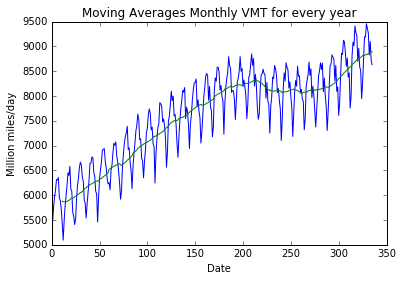

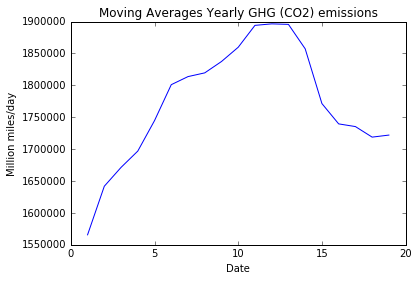

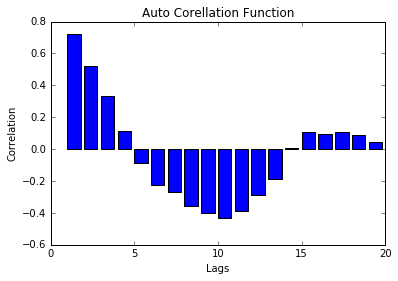

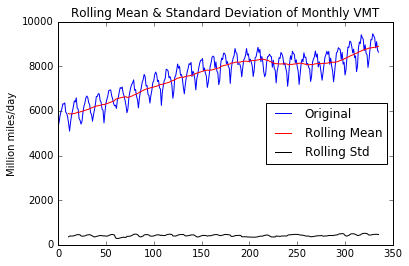

Results of Dickey-Fuller Test:
Test Statistic                  -2.003805
p-value                          0.284907
#Lags Used                      14.000000
Number of Observations Used    321.000000
Critical Value (5%)             -2.870586
Critical Value (1%)             -3.450887
Critical Value (10%)            -2.571590
dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

ghg = pd.read_csv('GHG_TRANS.csv')[::-1].set_index(['Year'])
vmt = pd.read_csv('VMT_Annual.csv')[::-1].set_index(['Date'])[5:24] #1990 - 2013

dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]

vmt_monthly = pd.read_csv('VMT_Monthly.csv', parse_dates=['Date'], date_parser=dateparse, index_col='Date')[::-1]

plt.plot(vmt_monthly.values)
plt.title(' plot of monthly VMT and it Moving average')
plt.ylabel('Million miles/day')

mv_avg_vmt = (vmt_monthly.rolling(window=12, center=False)).mean()
plt.plot(mv_avg_vmt.values)

plt.ylabel('Million miles/day')
plt.xlabel('Date')
plt.title('Moving Averages Monthly VMT for every year')

plt.show()

mv_avg_ghg = (ghg['CO2'].rolling(window=2, center=False)).mean()
plt.plot(mv_avg_ghg.values)
plt.ylabel('Million miles/day')
plt.xlabel('Date')
plt.title('Moving Averages Yearly GHG (CO2) emissions')

plt.show()

acf = sm.tsa.stattools.acf(ghg['CO2'])
sizeofacf = len(acf)
left = range(1, sizeofacf)
height = acf[1 : sizeofacf]
plt.bar(left, height)
plt.ylabel('Correlation')
plt.xlabel('Lags')
plt.title('Auto Corellation Function')

plt.show()


def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of Monthly VMT')
    plt.ylabel('Million miles/day')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries.values.ravel(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    

test_stationarity(vmt_monthly)


In [9]:
vmt_monthly = vmt_monthly ['Value']


DF tests the null hypothesis of a unit root being present in a time series sample. The alternative hypothesis is trend-stationarity.

Reject null hypothesis. 

The stationarity test on the Vehicle Miles travelled monthly shows a the series is non stationary.
the test statistic is smaller than the critical values, and the p-value is greater the alpha value 0.05

To make this series stationary - removing the trend or seaonality so we can build a predictive model,
we first perform a transformation - a log transform and calculate the moving average

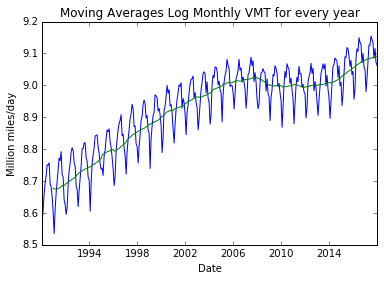

In [10]:
import numpy as np

vmt_monthly_log = np.log(vmt_monthly)
plt.plot(vmt_monthly_log)
plt.title('Log Transform plof of monthly VMT')
plt.ylabel('Million miles/day')

mv_avg_vmt = (vmt_monthly_log.rolling(window=12, center=False)).mean()
plt.plot(mv_avg_vmt)

plt.ylabel('Million miles/day')
plt.xlabel('Date')
plt.title('Moving Averages Log Monthly VMT for every year')

plt.show()

The green line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. After which we test for stationarity again.


In [12]:
vmt_log_moving_avg_diff = vmt_monthly_log - mv_avg_vmt
vmt_log_moving_avg_diff.head(12)
vmt_log_moving_avg_diff.dropna(inplace=True)


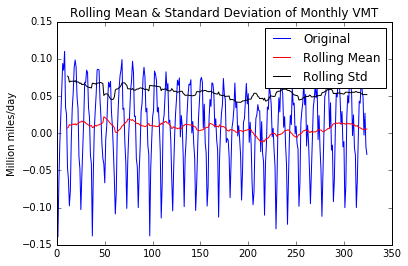

Results of Dickey-Fuller Test:
Test Statistic                  -3.285761
p-value                          0.015527
#Lags Used                      14.000000
Number of Observations Used    310.000000
Critical Value (5%)             -2.870909
Critical Value (1%)             -3.451622
Critical Value (10%)            -2.571762
dtype: float64


In [13]:
test_stationarity(vmt_log_moving_avg_diff)

The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.
For a much better approach to removing trend and seasonality can can decompose the time series

                        Monthly VMT - Decomposition


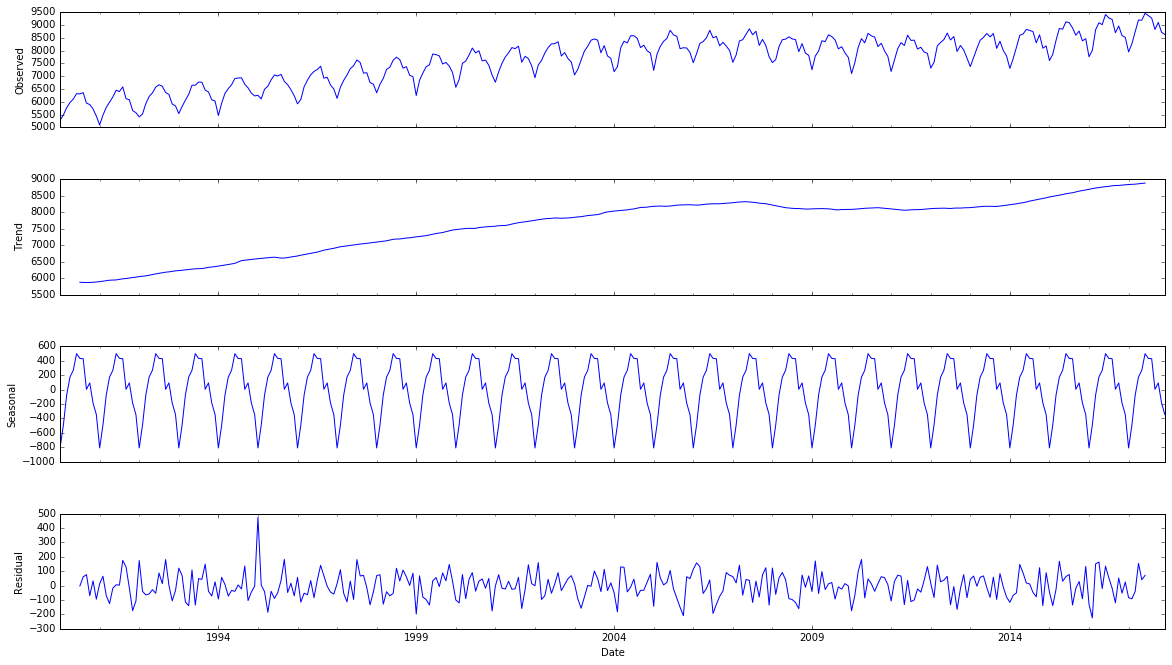

In [14]:
# vmt_monthly.reset_index(inplace=True)
# vmt_monthly['Date'] = pd.to_datetime(vmt_monthly['Date'])
# vmt_monthly = vmt_monthly.set_index('Date')
print("                        Monthly VMT - Decomposition")
res = sm.tsa.seasonal_decompose(vmt_monthly)
fig = res.plot()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.show()

We can test for stationarity again on the residue

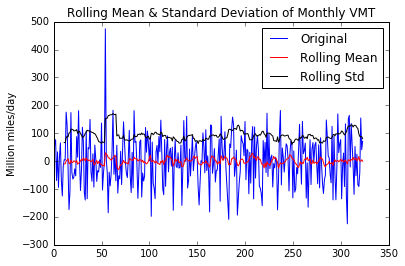

Results of Dickey-Fuller Test:
Test Statistic                -8.450321e+00
p-value                        1.669194e-13
#Lags Used                     1.400000e+01
Number of Observations Used    3.090000e+02
Critical Value (5%)           -2.870939e+00
Critical Value (1%)           -3.451691e+00
Critical Value (10%)          -2.571778e+00
dtype: float64


In [15]:
test_stationarity(res.resid.dropna())

the test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. Now can we attempt to make a prediction model of the monthly vmt series using ARIMA model.


In [16]:
vmt_log_diff = vmt_monthly_log - vmt_monthly_log.shift()
vmt_log_diff = vmt_log_diff.dropna()

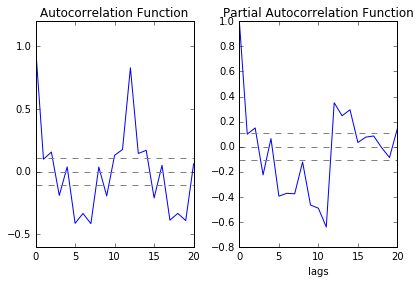

In [17]:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(vmt_log_diff.values, nlags=20)
lag_pacf = pacf(vmt_log_diff.values, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vmt_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vmt_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(vmt_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(vmt_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel("lags")
plt.tight_layout()


plt.show()



For our Arima model we set p and q values as lag value where the PACF and ACF chart crosses the upper confidence interval for the first time respectively. In this case we use 2, and 2

The resulting forecast gives:

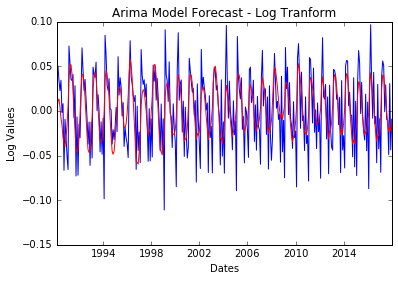

In [18]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(vmt_monthly_log, order=(2, 1, 2))  

results_ARIMA = model.fit(disp=-1)  
plt.plot(vmt_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

plt.title("Arima Model Forecast - Log Tranform")
plt.ylabel("Log Values")
plt.xlabel("Dates")

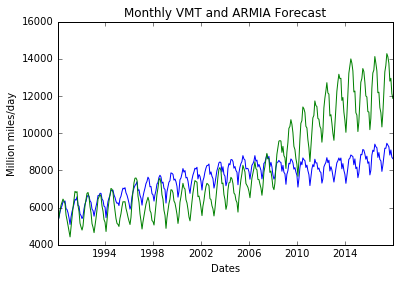

In [19]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(vmt_monthly_log, index=vmt_monthly_log.index)
predictions_ARIMA_log2 = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log2)
plt.plot(vmt_monthly)
plt.plot(predictions_ARIMA)
plt.title('Monthly VMT and ARMIA Forecast')
plt.ylabel('Million miles/day')
plt.xlabel('Dates')

The Mean Squared Error for the ARMIA Forecast

In [20]:
from  sklearn.metrics import mean_squared_error

mean_squared_error(vmt_monthly, predictions_ARIMA)

3855483.6069889138

Comparing yearly VMT and yearly GHG emissions

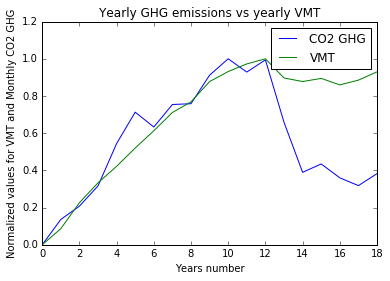

In [39]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing

x = ghg['CO2'][1:] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


plt.plot(df)

x = vmt #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

plt.plot(df2)

plt.title("Yearly GHG emissions vs yearly VMT")
plt.ylabel("Normalized values for VMT and Monthly CO2 GHG")
plt.xlabel('Years number')
plt.legend(['CO2 GHG', 'VMT'])
plt.show()


In [40]:
from scipy.stats import pearsonr

pearsonr(df.values, df2.values)


(array([ 0.6646079]), array([ 0.00190826]))

Calculating a Pearson correlation coefficient on the Yearly CO2 emissions and Vehicle Miles travelled, and the p-value for testing non-correlation gives

Correllation Coefficient of 0.6646079
 
p-Value: 0.00190826

Que 4. Model Fitting and Prediction (20 points)

The bank of Israel has published the data for unemployment rate (per 100 Israeli workforces)
from 1980-12-31 to 2013-09-02. Download the data from Quandl (code:
BANKISRAEL/BI_UE_R_A) into MATLAB. Estimate the likely rate of unemployment by year
2020 (10 points).
Explain how one can evaluate the accuracy of the estimate (5 points) and provide the accuracy
as a percentage. (5 points)


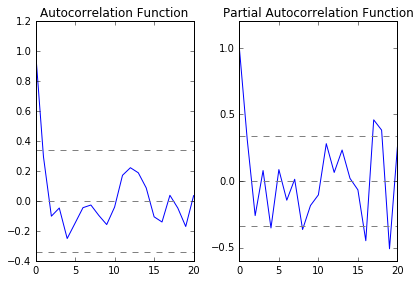

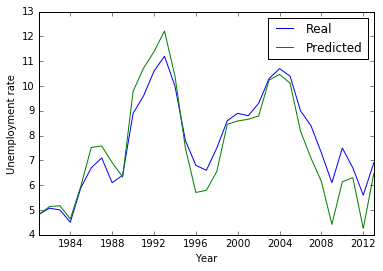

In [6]:
import quandl
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import average_precision_score
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

quandl.ApiConfig.api_key = 'yaNiCEXsWDEoxi3xxt_y'

Dataq = quandl.get("BANKISRAEL/BI_UE_R_A", start_date="1980-12-31", end_date="2013-09-02")

Data = Dataq - Dataq.shift()

lag_acf = acf(Data[1:], nlags=20)
lag_pacf = pacf(Data[1:], nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.show()

model = ARIMA(Dataq, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
# print results_ARIMA.summary()


predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA = pd.Series(Dataq['Value'], index=Dataq.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)

forecast_result = results_ARIMA.predict('2011-12-31', '2020-12-31')
forecast = results_ARIMA.predict('2011-12-31', '2020-12-31').values
forecast_cumsum = forecast.cumsum()

pred_forecast =  pd.Series(Dataq['Value'], index=Dataq.index)[:10]
pred_forecast = pred_forecast.add(forecast_cumsum, fill_value=0)


plt.plot(Dataq)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("Unemployment rate")
plt.legend(['Real','Predicted'])


plt.show()



We can determine the accuracy of the prediction by looking at how the foecast performed on historical data.
We can evaluate this by calculating the root mean square error which is a measure of the difference between 
values that are known and locations that have been predicted. RMS error is derived by  squaring the differences
between known and predicted values, adding those together, dividing that by the number of test points, and then
taking the square root of that result.

We can also determine the coefficient of determination which is how close the data are to the fitted regression line.

To get an accuracy measure as a percentage, we can calculate the mean absolute percentage error (MAPE) which
expresses The size of the error in percentage terms.

The MAPE of the model is

61.053287765782238%

The forecast for rate of unemployment by year 2020  is 10.563310%
